In [1]:
# Created by University of California, Berkeley >> Foundation of Data Science Cource
 
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In this example, we will explore statistics for two classic novels: *The Adventures of Huckleberry Finn* by Mark Twain, and *Little Women* by Louisa May Alcott. The text of any book can be read by a computer at great speed. Books published before 1923 are currently in the *public domain*, meaning that everyone has the right to copy or use the text in any way. [Project Gutenberg](http://www.gutenberg.org/) is a website that publishes public domain books online. Using Python, we can load the text of these books directly from the web.

This example is meant to illustrate some of the broad themes of this text. Don't worry if the details of the program don't yet make sense. Instead, focus on interpreting the images generated below.

First, we read the text of both books into lists of chapters, called `huck_finn_chapters` and `little_women_chapters`.

In [2]:
# Read two books, fast!

huck_finn_url = 'http://www.gutenberg.org/cache/epub/76/pg76.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'http://www.gutenberg.org/cache/epub/514/pg514.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

While a computer cannot understand the text of a book, we can still use it to provide us with some insight into the structure of the text. The name `huck_finn_chapters` is currently bound to a list of all the chapters in the book. We can place those chapters into a table to see how each begins.

In [3]:
Table([huck_finn_chapters], ['Chapters'])

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


Each chapter begins with a chapter number in Roman numerals. That is followed by the first sentence of the chapter. Project Gutenberg has printed the first word of each chapter in upper case. 

The book describes a journey that Huck and Jim take along the Mississippi River. Tom Sawyer joins them towards the end as the action heats up. We can quickly visualize how many times these characters have each been mentioned at any point in the book.

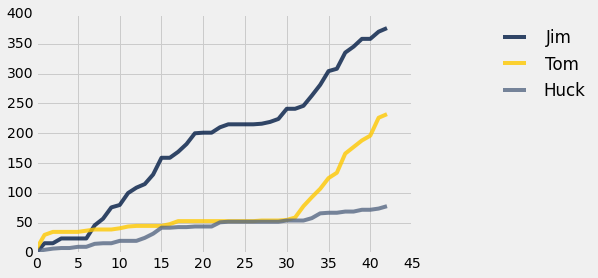

In [4]:
counts = Table([np.char.count(huck_finn_chapters, "Jim"), 
                np.char.count(huck_finn_chapters, "Tom"),
                np.char.count(huck_finn_chapters, "Huck")], 
               ["Jim", "Tom", "Huck"])
counts.cumsum().plot(overlay=True)

In the plot above, the horizontal axis shows chapter numbers and the vertical axis shows how many times each character has been mentioned so far. You can see that Jim is a central character, by the large number of times his name appears. Notice how Tom is hardly mentioned for much of the book until after Chapter 30. His curve and Jim's rise sharply at that point, as the action involving both of them intensifies. As for Huck, his name hardly appears at all, because he is the narrator. 

*Little Women* is a story of four sisters growing up together during the civil war. In this book, chapter numbers are spelled out and chapter titles are written in all capital letters.

In [5]:
Table({'Chapters': little_women_chapters})

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


We can track the mentions of main characters to learn about the plot of this book as well.  The protagonist Jo interacts with her sisters Meg, Beth, and Amy regularly, up until Chapter 27 when she moves to New York alone.

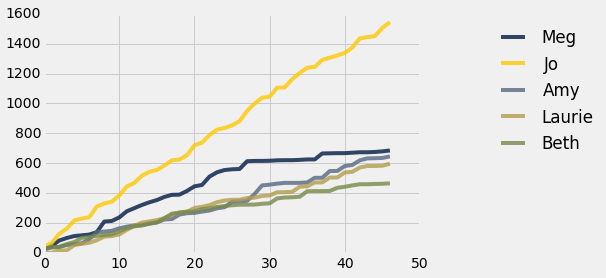

In [6]:
people = ["Meg", "Jo", "Beth", "Amy", "Laurie"]
people_counts = Table({pp: np.char.count(little_women_chapters, pp) for pp in people})
people_counts.cumsum().plot(overlay=True)

Laurie is a young man who marries one of the girls in the end. See if you can use the plots to guess which one.